# Problem 1 : Analysis of Numeric Variables

In [36]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [52]:
#Import the dataset
houseData = pd.read_csv("train.csv")
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
SalePrice = houseData['SalePrice']
LotArea = houseData['LotArea']
GrLivArea = houseData['GrLivArea']
TotalBsmtSF = houseData["TotalBsmtSF"]
GarageArea = houseData["GarageArea"]

<Axes: >

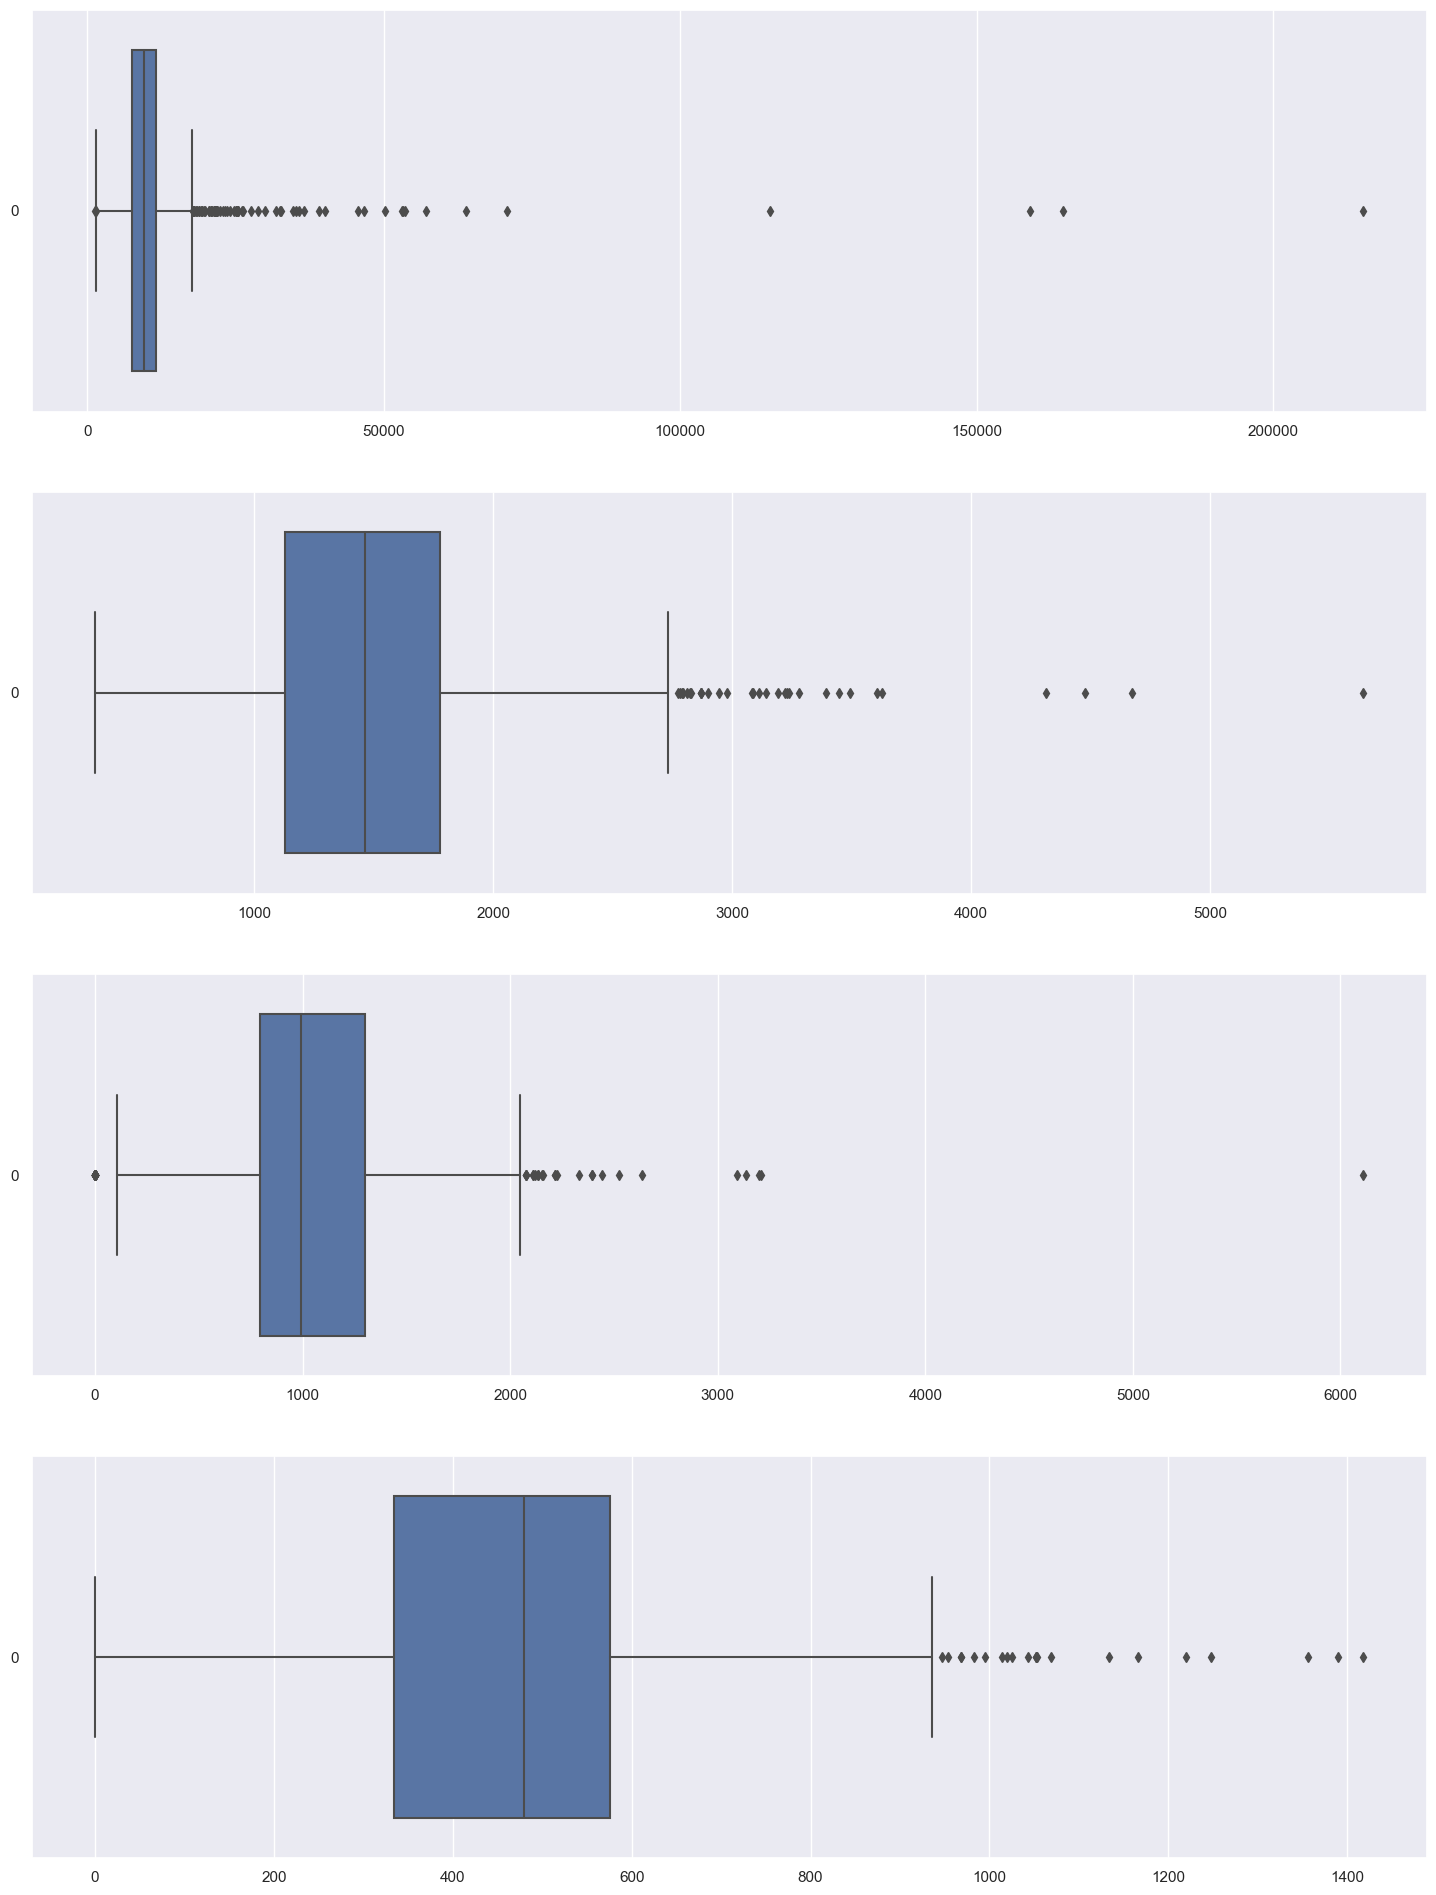

In [39]:
f, axes = plt.subplots(4, figsize=(18, 24))
sb.boxplot(data = LotArea, orient = 'h', ax = axes[0])
sb.boxplot(data = GrLivArea, orient = 'h', ax = axes[1])
sb.boxplot(data = TotalBsmtSF, orient = 'h', ax = axes[2])
sb.boxplot(data = GarageArea, orient = 'h', ax = axes[3])

Unable to visualise the outliers for all 4 variables by boxplot. Hence, need to use calculations to get points that are outside the whiskers of  Q1 – 1.5 IQR and Q3 + 1.5 IQR

In [40]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [51]:
data = {'LotArea' : LotArea, 'GrLivArea' : GrLivArea, 'TotalBsmtSF' : TotalBsmtSF, 'GarageArea' : GarageArea}

for name, dataset in data.items():
    outliers = find_outliers_IQR(dataset)
    print(f"{name} has {len(outliers)} outliers.")

LotArea has 69 outliers.
GrLivArea has 31 outliers.
TotalBsmtSF has 61 outliers.
GarageArea has 21 outliers.


#### a) LotArea has the most number of outliers. It has 69 outliers.

<Axes: xlabel='GarageArea', ylabel='Count'>

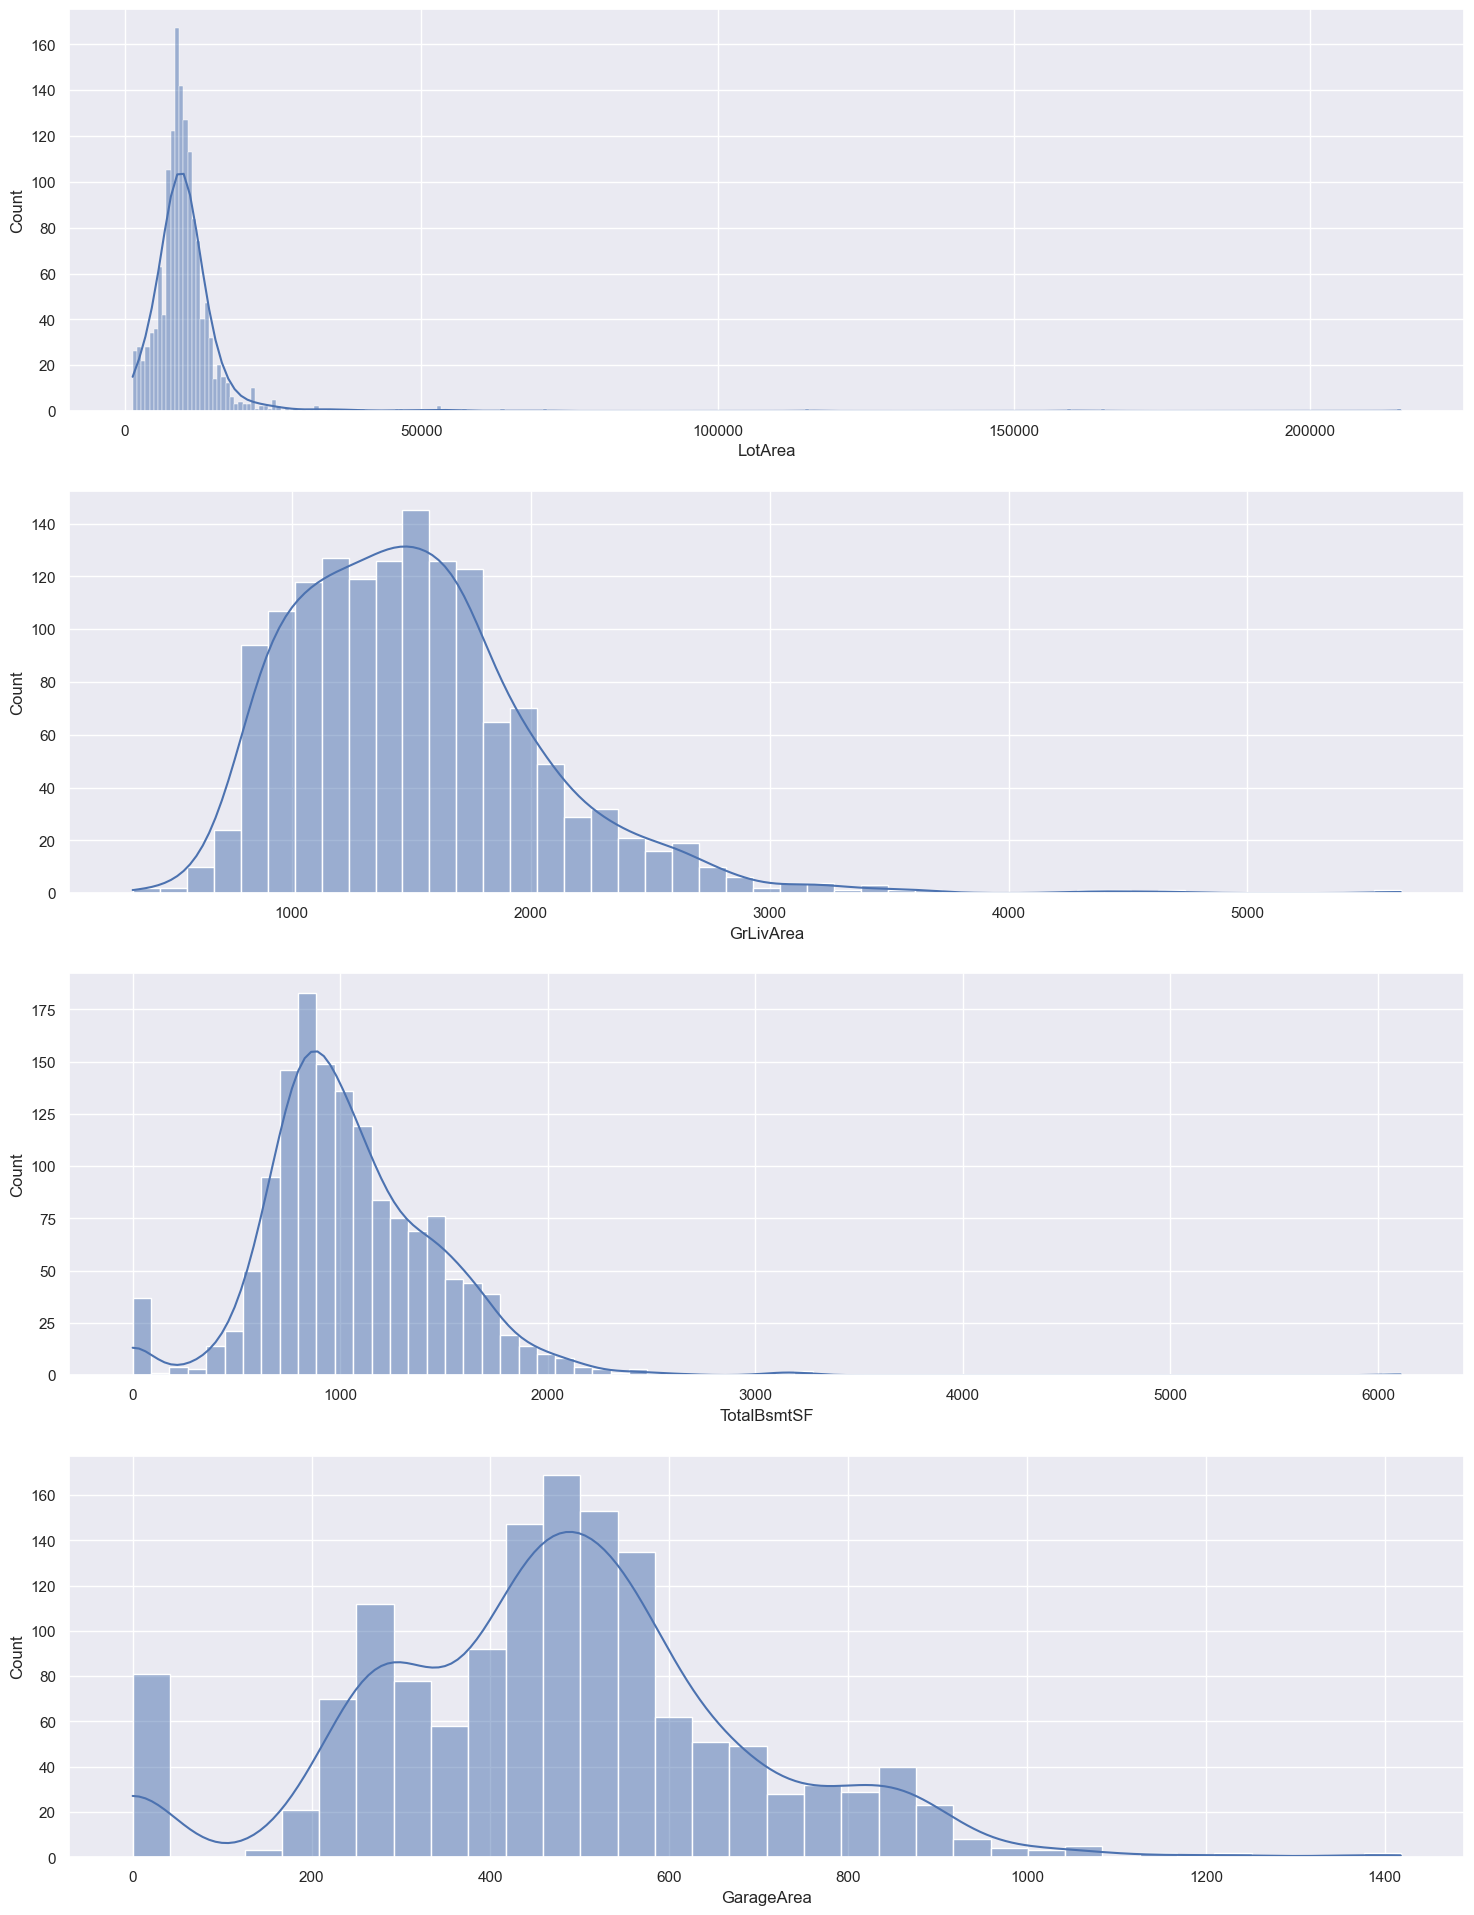

In [55]:
f, axes = plt.subplots(4, figsize=(18, 24))
sb.histplot(data = LotArea, kde=True, ax = axes[0])
sb.histplot(data = GrLivArea, kde=True, ax = axes[1])
sb.histplot(data = TotalBsmtSF, kde=True, ax = axes[2])
sb.histplot(data = GarageArea, kde=True, ax = axes[3])

### b) From the histogram with KDE plot, the variable LotArea looks the most skewed from a regular normal distribution. The graph shows that it is skewed positively.

We can verify it using the pandas.DataFrame.skew syntax.

In [64]:
print("The skew value of LotArea is: ", LotArea.skew())
print("The skew value of GrLivArea is: ",GrLivArea.skew())
print("The skew value of TotalBsmtSF is: ",TotalBsmtSF.skew())
print("The skew value of GarageArea is: ",GarageArea.skew())

The skew value of LotArea is:  12.207687851233496
The skew value of GrLivArea is:  1.3665603560164552
The skew value of TotalBsmtSF is:  1.5242545490627664
The skew value of GarageArea is:  0.17998090674623907


#### b) As verified with the skew value, LotArea is the most skewed from a regular normal distribution.

In [87]:
corrDF = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
corrDF.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


In [88]:
print(corrDF.corr())

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<Axes: >

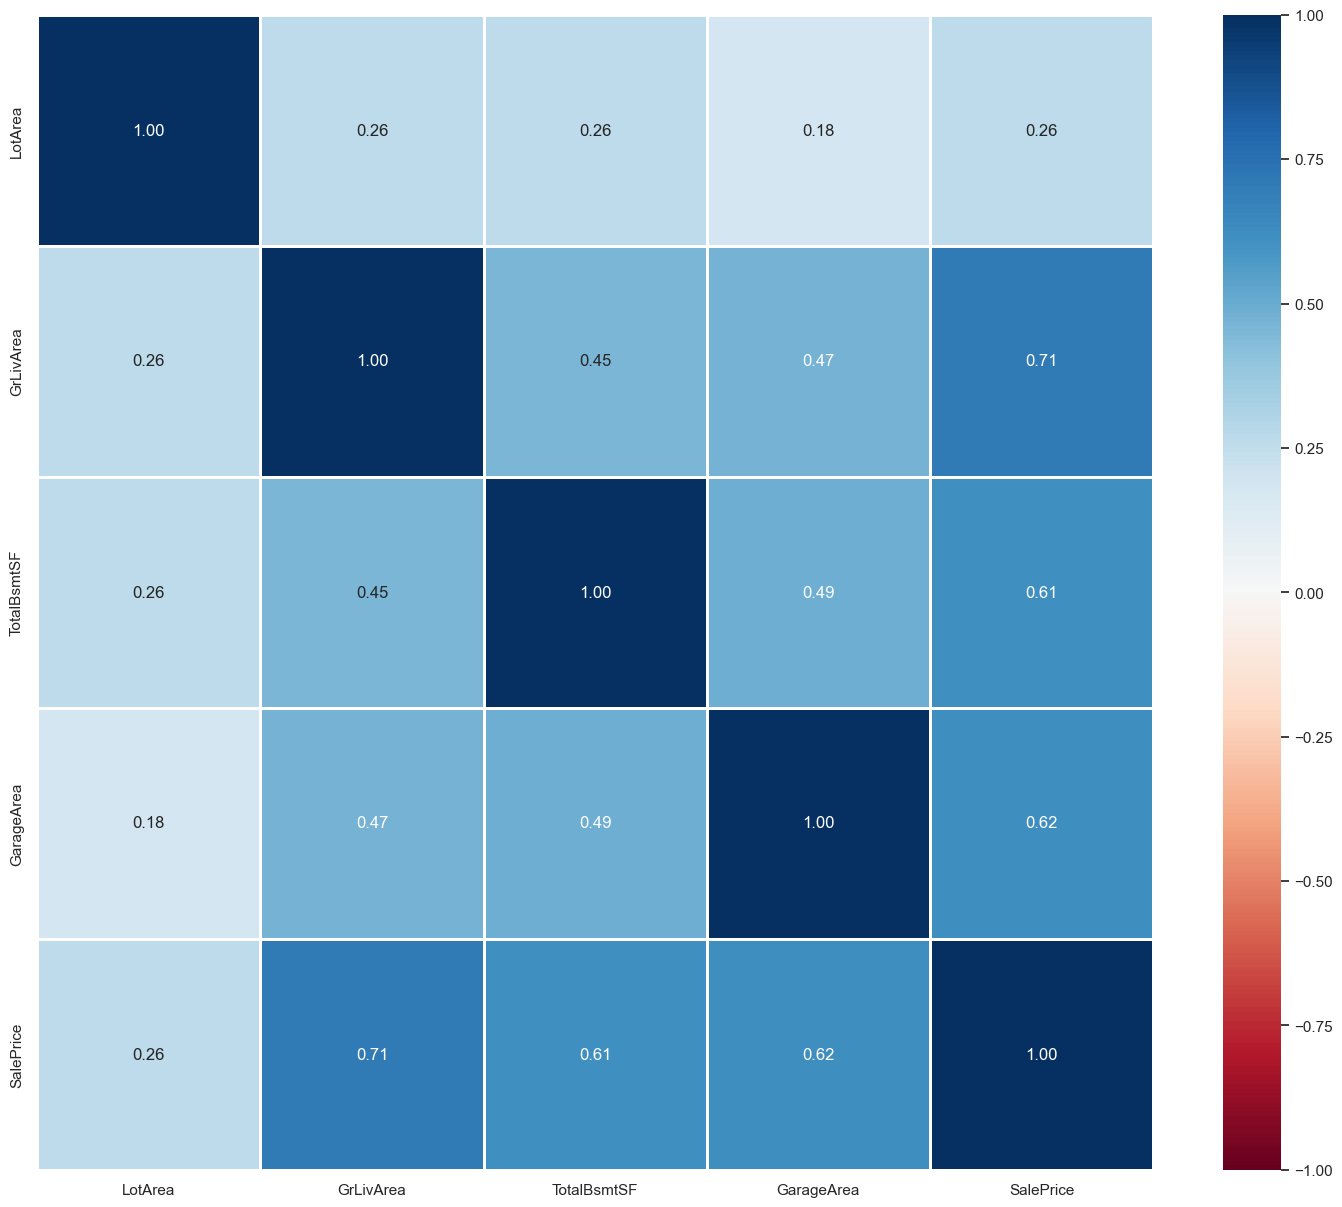

In [89]:
f= plt.subplots(figsize=(18, 15))
sb.heatmap(corrDF.corr(),vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", cmap = "RdBu")

c) The correlation value of GrLivArea and GarageArea to SalePrice is 0.71 and 0.62 respectively. Both variable has a higher correlation value compared to LotArea of 0.26 and TotalBsmtSF of 0.61. 
#### Hence, GrLivArea and GarageArea are the two variables that will help in predicting SalePrice value

# Problem 2 : Analysis of Categorical Variables

In [93]:
SalePrice = houseData['SalePrice']
MSSubClass = houseData['MSSubClass']
Neighborhood = houseData['Neighborhood']
BldgType = houseData['BldgType']
OverallQual = houseData['OverallQual']

corrDF2 = pd.DataFrame(houseData[['SalePrice', 'MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
corrDF2.head()

,SalePrice,MSSubClass,Neighborhood,BldgType,OverallQual
0,208500,60,CollgCr,1Fam,7
1,181500,20,Veenker,1Fam,6
2,223500,60,CollgCr,1Fam,7
3,140000,70,Crawfor,1Fam,7
4,250000,60,NoRidge,1Fam,8


In [98]:
#Unique levels of each variable
print("Number of level for MSSubClass :", len(MSSubClass.unique()))
print("Number of level for Neighborhood :", len(Neighborhood.unique()))
print("Number of level for BldgType :", len(BldgType.unique()))
print("Number of level for OverallQual :", len(OverallQual.unique()))

Number of level for MSSubClass : 15
Number of level for Neighborhood : 25
Number of level for BldgType : 5
Number of level for OverallQual : 10


In [101]:
print(Neighborhood.value_counts(sort=True))

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


### a) The Neighborhood variable has the most number of level out of the other 3 variable with 25 levels. The "NAmes" level has the most number of houses out of the other 24 levels with 225 houses.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

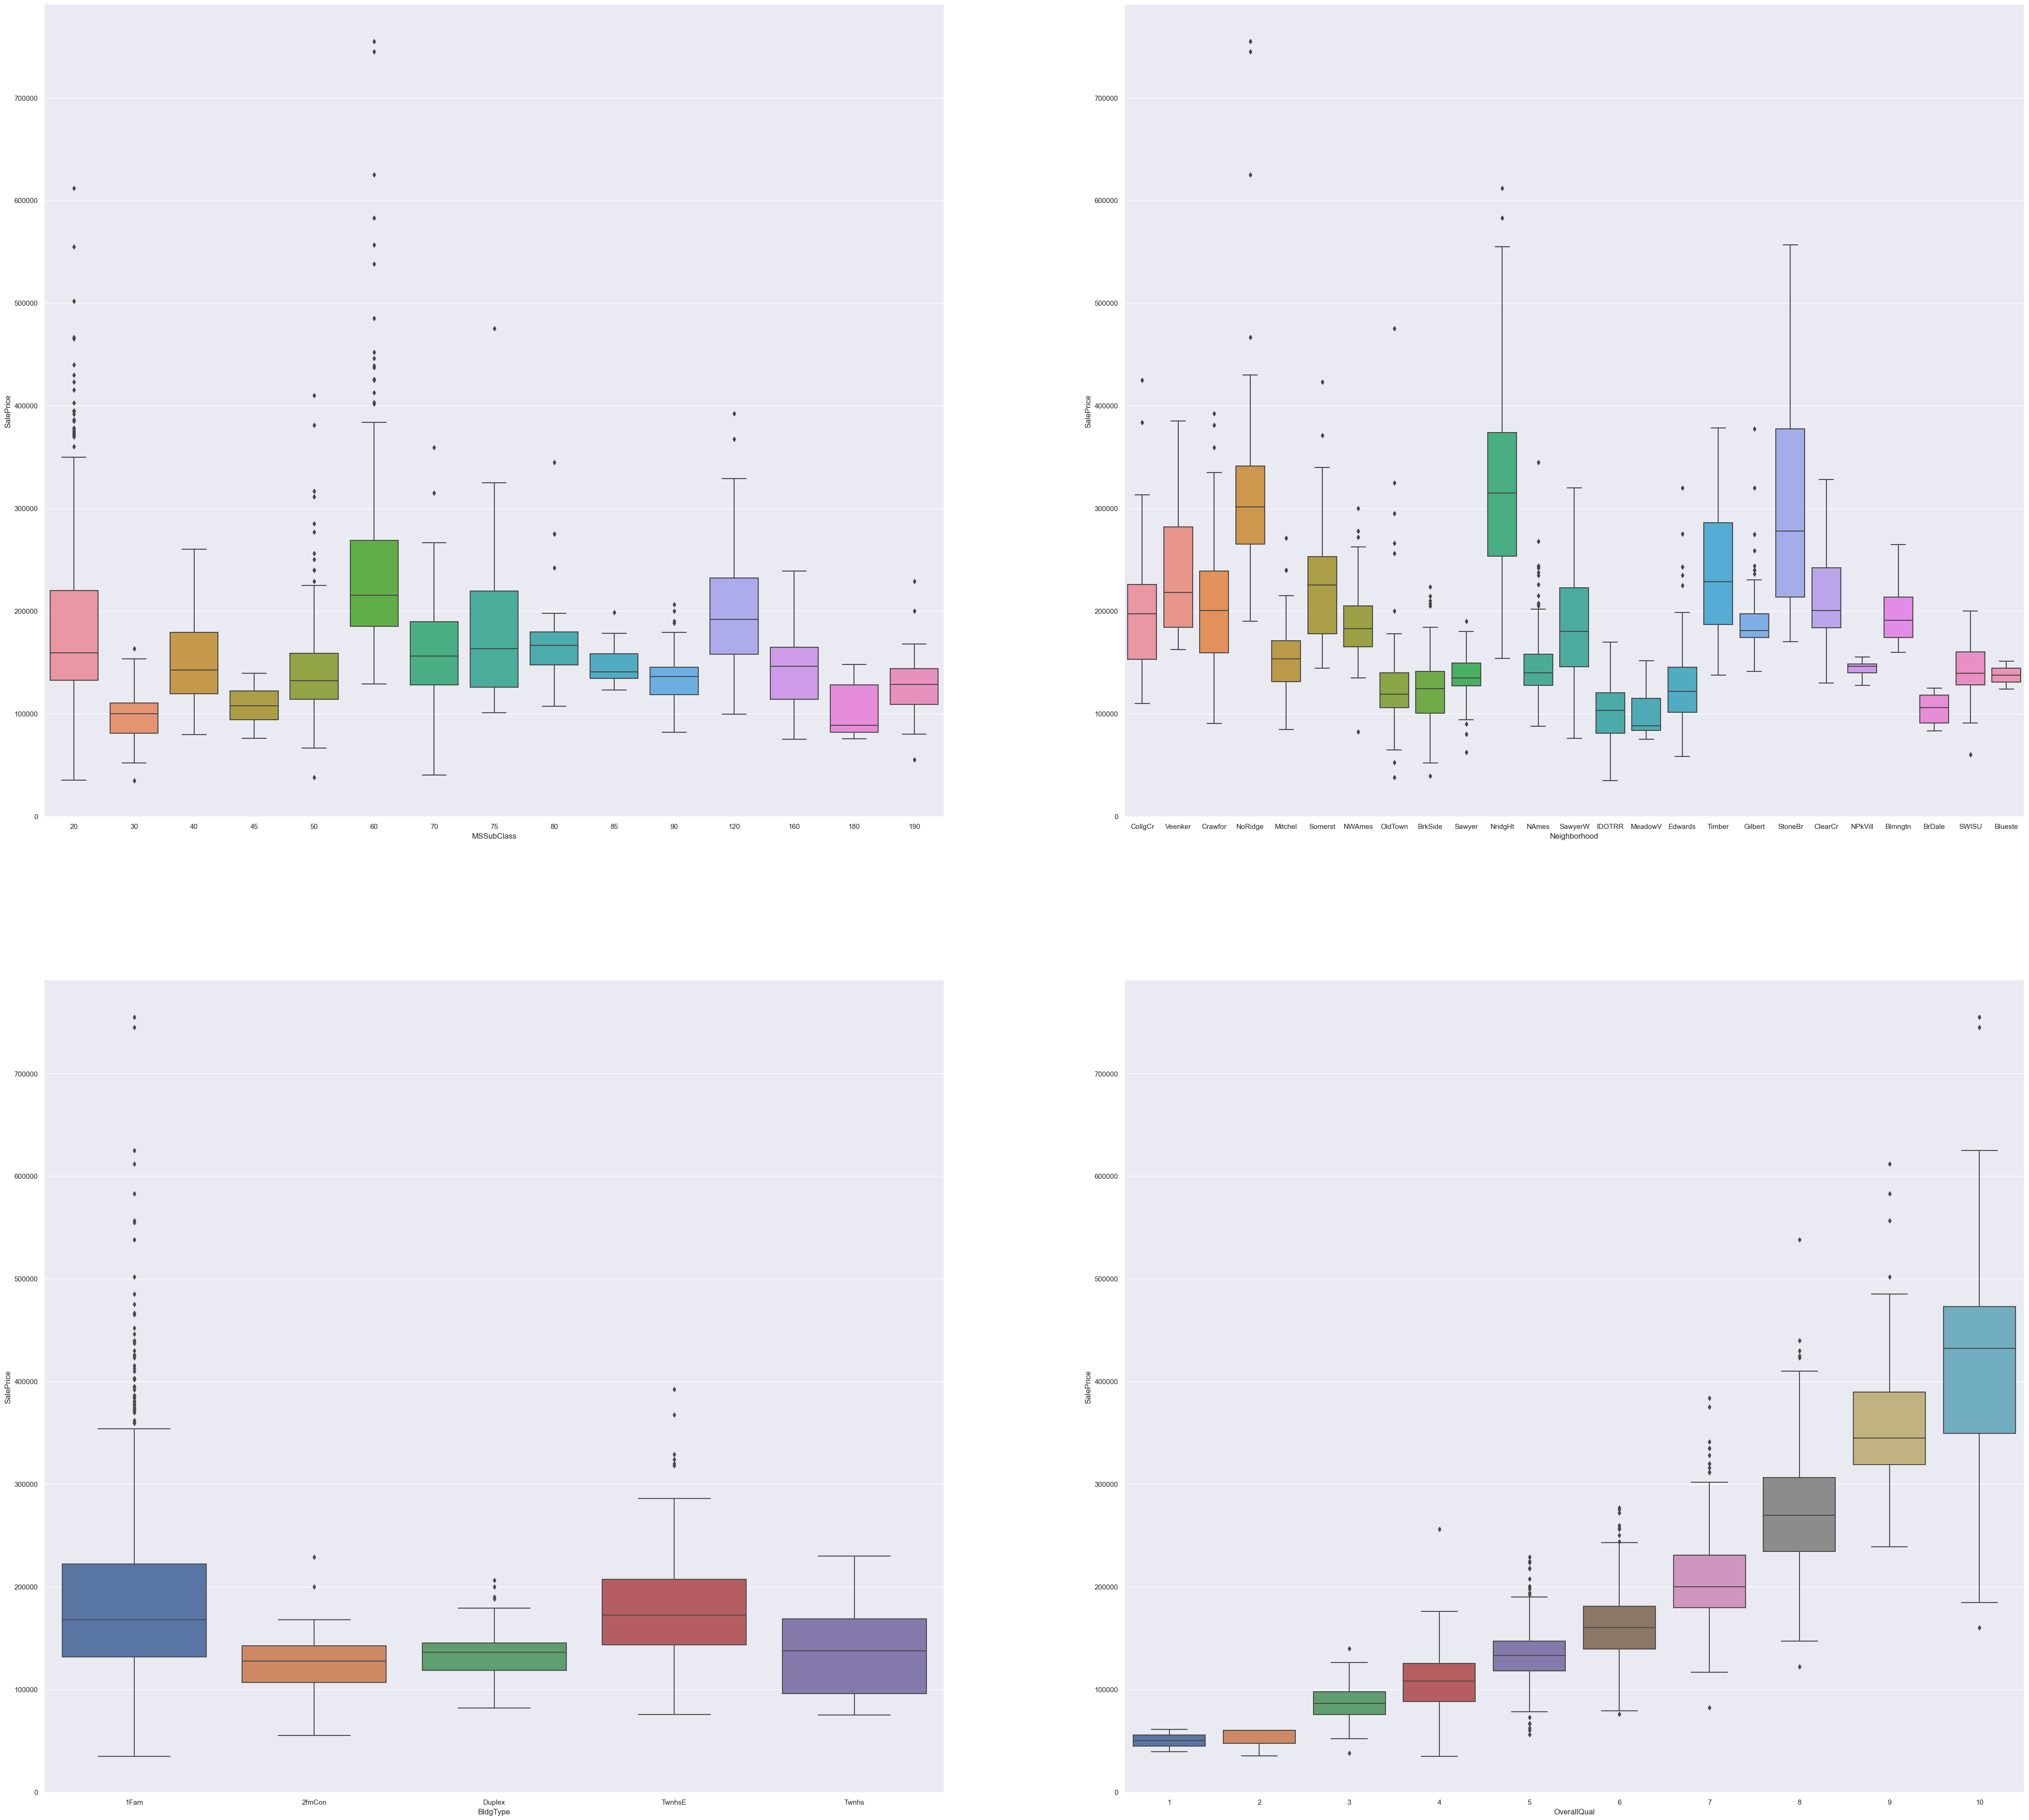

In [111]:
f, axes= plt.subplots(2,2, figsize=(55, 50))
sb.boxplot(x=MSSubClass, y=SalePrice, orient = 'v', ax=axes[0,0])
sb.boxplot(x=Neighborhood, y=SalePrice, orient = 'v', ax=axes[0,1])
sb.boxplot(x=BldgType, y=SalePrice, orient = 'v', ax=axes[1,0])
sb.boxplot(x=OverallQual, y=SalePrice, orient = 'v', ax=axes[1,1])

#### b) First variable is OverallQual as a general trend can be observed with SalePrice. As OverallQual increase, the SalePrice of houses increases.
#### Second variable is Neighbourhood, as compared to BldgType and MSSubClass. As for the relationship between BldgType and SalePrice, there is no trend that can be observed. Comparing it to MSSubClass, both NeighbourHood and MSSubClass has roughly the same trend when compared to SalePrice. However, NeighbourHood provides a data with greater sample size as compared to MSSubClass. In addition, the data also contains less outliers which will make the prediction in SalePrice to be more consistent. Hence it will be useful when comparing it to SalePrice.

# Problem 3 : Interesting Questions for EDA

### Q3b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.

In [116]:
yremod = houseData['YearRemodAdd']
corrdf3 = pd.DataFrame(houseData[['SalePrice', 'YearRemodAdd']])

In [124]:
#Number of unique value of YearRemodAdd
print("Number of level for YearRemodAdd :", len(yremod.unique()))

Number of level for YearRemodAdd : 61


In [134]:
print(yremod.value_counts(sort=True))

YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: count, Length: 61, dtype: int64


<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

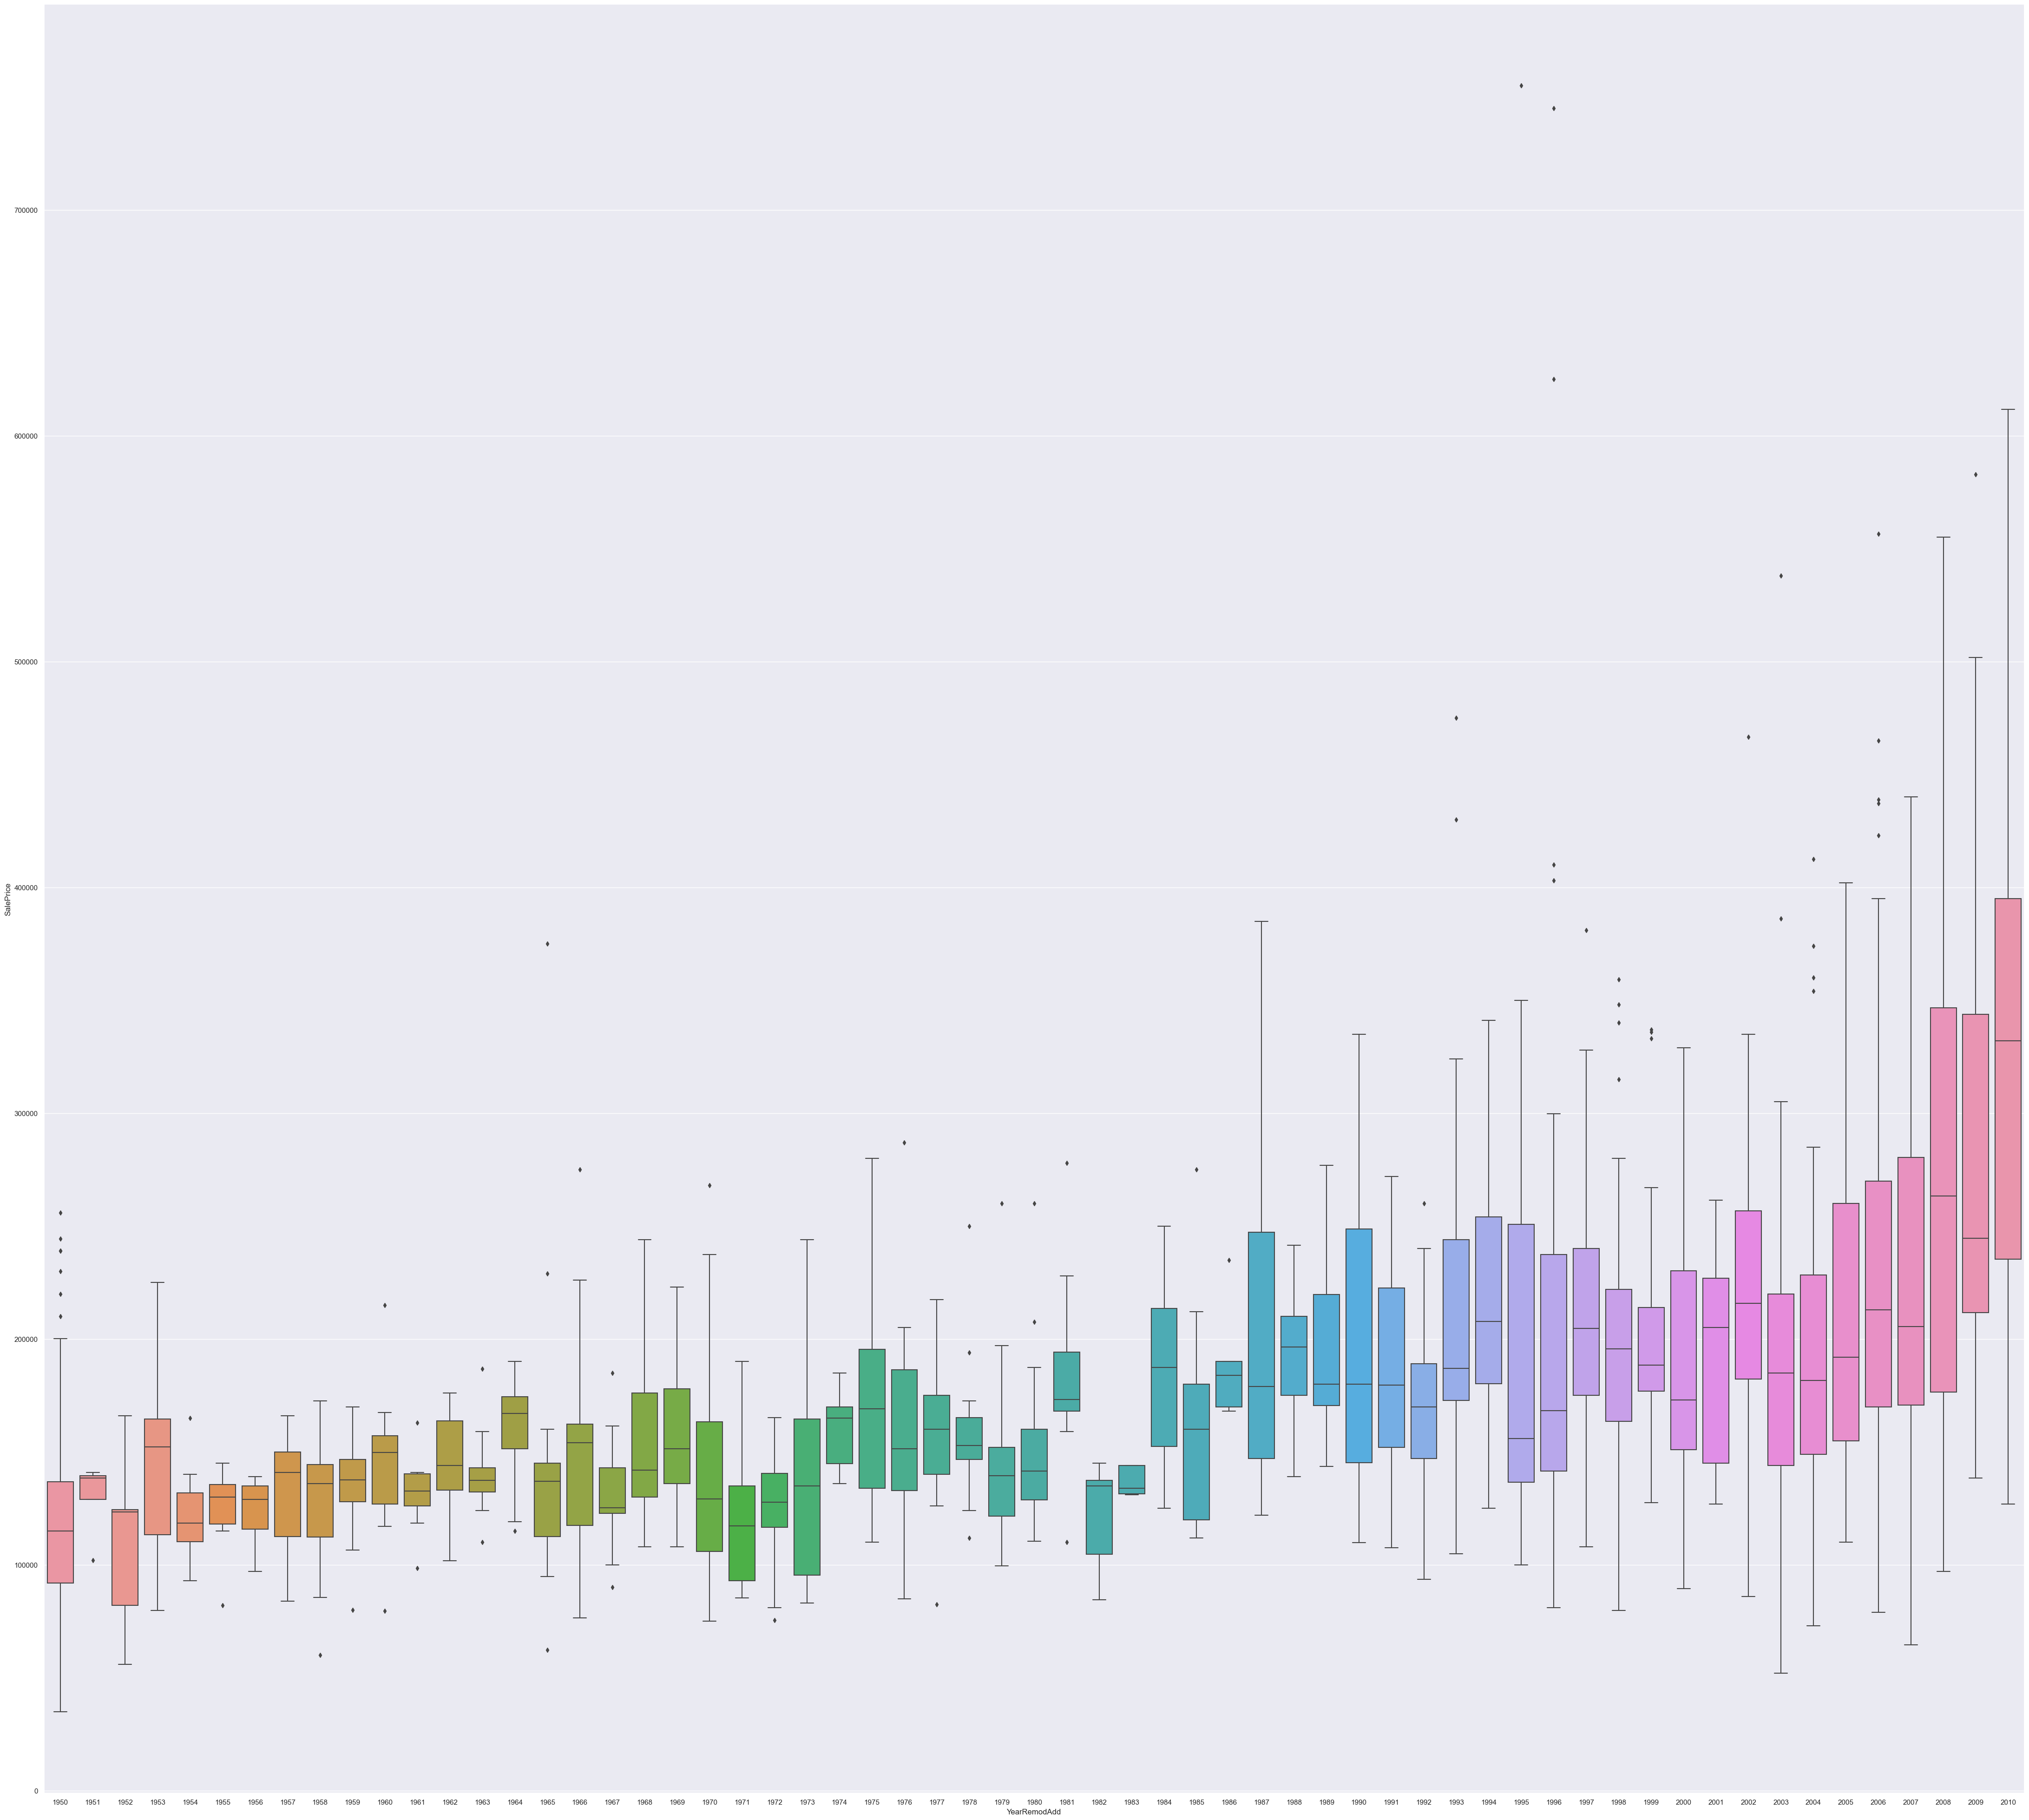

In [136]:
f= plt.subplots(figsize=(55, 50))
sb.boxplot(x=yremod, y=SalePrice, orient = 'v')

#### 3c) The SalePrice of a house gets affected by how recently it get modelled. Specifically the more recent is got remodelled, the higher the selling price of the house. As shown by the boxplot visualisation increasing trend, as YearRemod increases, it can be observed that the mean SalePrice of the house generally increased.